In [1]:
# import segmentation_models as sm
from sklearn.model_selection import train_test_split

from brainseg.generator import TrainGenerator, TestGenerator
from brainseg.loader import Loader
from brainseg.utils import load_data, show_batch
from brainseg.slide_provider import SlideHandler
from brainseg.provider import provider

import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import plot_model

# sm.set_framework("tf.keras")

2022-08-16 13:15:08.222252: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/yujie/Documents/Program/elastix/lib:
2022-08-16 13:15:08.222276: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
from brainseg.models.multires_unet4 import multires_unet

In [7]:
model = multires_unet(n_res=3, n_classes=1, im_sz=224, n_channels=3, n_filters_start=32,
                      growth_factor=1.2, all_outputs=True)

In [8]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 convolution_block_180 (Convolu  (None, 224, 224, 32  1024       ['input_5[0][0]']                
 tionBlock)                     )                                                                 
                                                                                                  
 residual_block_72 (ResidualBlo  (None, 224, 224, 32  19008      ['convolution_block_180[0][0]']  
 ck)                            )                                                           

 ck)                                                                                              
                                                                                                  
 convolution_block_140 (Convolu  (None, 112, 112, 38  11134      ['batch_normalization_136[0][0]']
 tionBlock)                     )                                                                 
                                                                                                  
 residual_block_79 (ResidualBlo  (None, 28, 28, 55)  55440       ['residual_block_78[0][0]']      
 ck)                                                                                              
                                                                                                  
 residual_block_56 (ResidualBlo  (None, 112, 112, 38  26676      ['convolution_block_140[0][0]']  
 ck)                            )                                                                 
          

 nspose)                                                                                          
                                                                                                  
 dropout_35 (Dropout)           (None, 112, 112, 32  0           ['max_pooling2d_20[0][0]']       
                                )                                                                 
                                                                                                  
 convolution_block_150 (Convolu  (None, 28, 28, 55)  23045       ['batch_normalization_146[0][0]']
 tionBlock)                                                                                       
                                                                                                  
 concatenate_18 (Concatenate)   (None, 56, 56, 78)   0           ['conv2d_transpose_17[0][0]',    
                                                                  'residual_block_77[0][0]']      
          

 convolution_block_160 (Convolu  (None, 28, 28, 55)  43340       ['batch_normalization_156[0][0]']
 tionBlock)                                                                                       
                                                                                                  
 convolution_block_215 (Convolu  (None, 112, 112, 38  24130      ['batch_normalization_210[0][0]']
 tionBlock)                     )                                                                 
                                                                                                  
 residual_block_95 (ResidualBlo  (None, 56, 56, 46)  38916       ['residual_block_94[0][0]']      
 ck)                                                                                              
                                                                                                  
 residual_block_64 (ResidualBlo  (None, 28, 28, 55)  55440       ['convolution_block_160[0][0]']  
 ck)      

                                                                                                  
 batch_normalization_239 (Batch  (None, 14, 14, 55)  220         ['dropout_38[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 cropping2d_2 (Cropping2D)      (None, 14, 14, 46)   0           ['residual_block_67[0][0]']      
                                                                                                  
 cropping2d_3 (Cropping2D)      (None, 14, 14, 32)   0           ['residual_block_89[0][0]']      
                                                                                                  
 concatenate_21 (Concatenate)   (None, 14, 14, 133)  0           ['batch_normalization_239[0][0]',
                                                                  'cropping2d_2[0][0]',           
          

                                                                                                  
 residual_block_105 (ResidualBl  (None, 112, 112, 38  26676      ['residual_block_104[0][0]']     
 ock)                           )                                                                 
                                                                                                  
 residual_block_69 (ResidualBlo  (None, 112, 112, 38  26676      ['residual_block_68[0][0]']      
 ck)                            )                                                                 
                                                                                                  
 dropout_41 (Dropout)           (None, 112, 112, 38  0           ['residual_block_105[0][0]']     
                                )                                                                 
                                                                                                  
 dropout_2

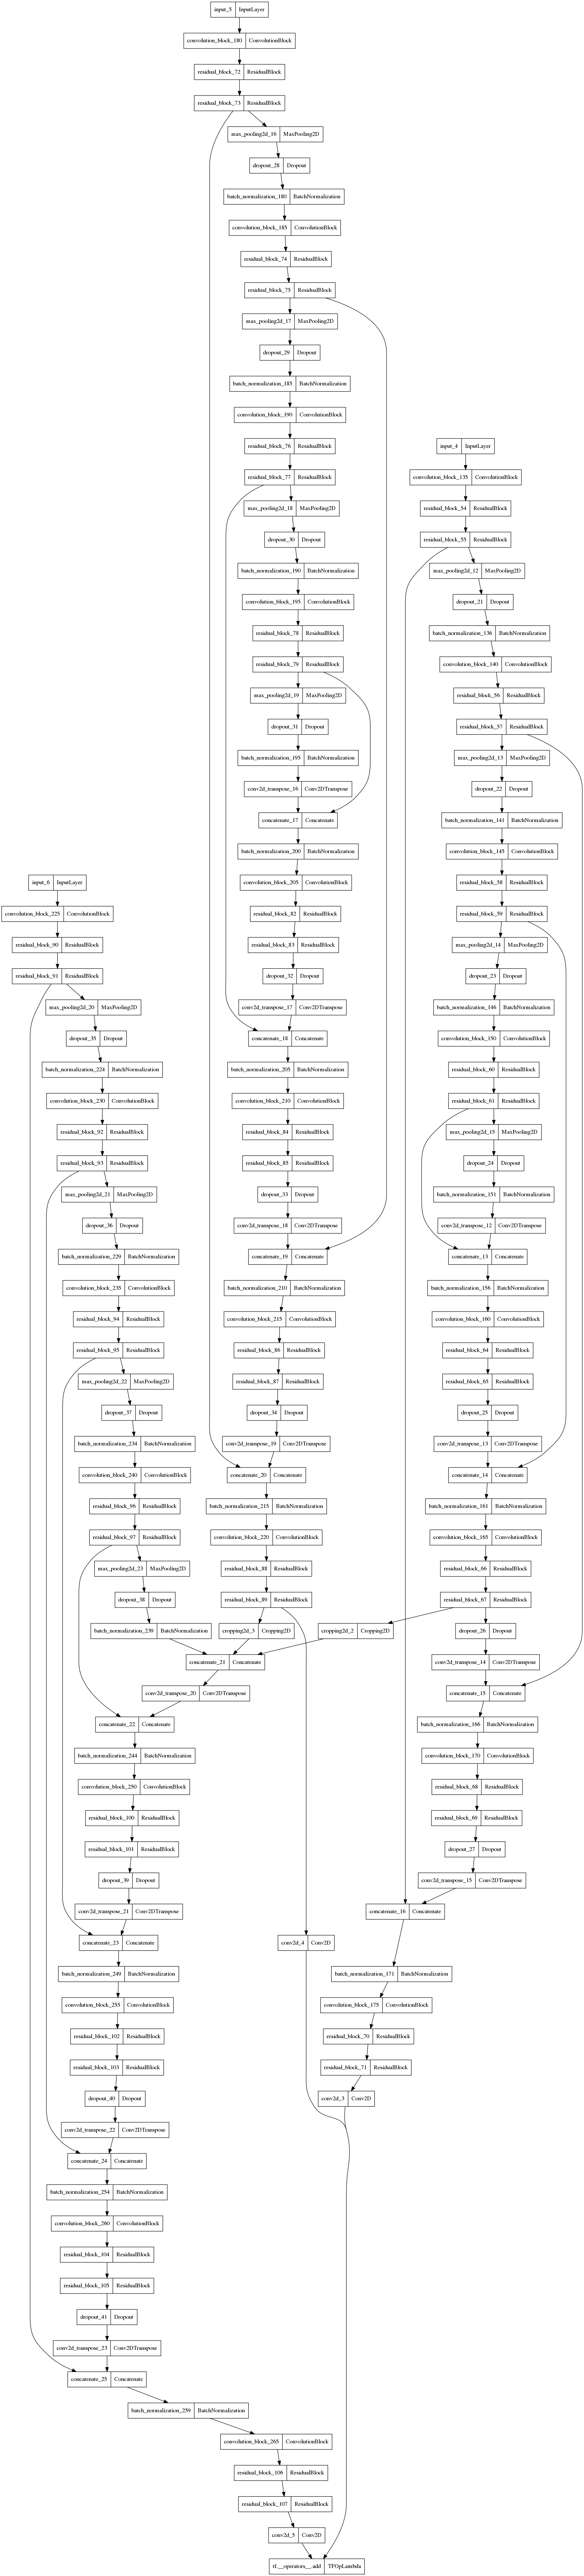

In [9]:
plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)


In [6]:
raise

RuntimeError: No active exception to reraise

In [ ]:
dataset = load_data("data/dataset/tinyset.pck")

In [ ]:
sh = SlideHandler("/media/nathan/LaCie/M148_RH/", "/media/nathan/KINGSTON/BrainMapping/filled_masks_148/")
provider.register(sh)

In [ ]:
def preprocess(x, y):
    x = x / 255.
    y = y.astype(np.float64)[:, :, :1]
    return x, y

In [ ]:
train_dataset, test_dataset = train_test_split(dataset, random_state=0)

In [ ]:
train_gen = TrainGenerator(Loader(train_dataset), batch_size=4, preprocess=preprocess)
test_gen = TestGenerator(Loader(train_dataset), batch_size=4, preprocess=preprocess)

## Generator validation

In [ ]:
show_batch(train_gen[0])

# Model

In [ ]:
model = multires_unet(n_res=3, n_classes=1, im_sz=224, n_channels=3, n_filters_start=32,
                      growth_factor=1.2, all_outputs=True)
model.compile(
    'Adam',
    loss=sm.losses.bce_jaccard_loss,
    metrics=[sm.metrics.iou_score],
)

In [ ]:
for i in range(10):
    model.fit(train_gen)
    model.evaluate(test_gen)

In [ ]:
preds = model.predict(test_gen)

In [ ]:
b = test_gen[0]

len(b[0])

show_batch((b[0], preds[:4]))

In [ ]:
def show_batch_thr(batch, thr=0.5):
    for i, (a, b) in enumerate(zip(*batch)):
        plt.subplot(2, len(batch[0]), 1 + i)
        plt.imshow(a)
        plt.subplot(2, len(batch[0]), 1 + i + len(batch[0]))
        plt.imshow(b > thr)

In [ ]:
show_batch_thr((b[0], preds[:4]), 0.3)